In [1]:
import arrow as arw
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns

from salishsea_tools import places, teos_tools

%matplotlib inline

# Get Observations

In [2]:
observations_dataset = nc.Dataset('https://salishsea.eos.ubc.ca/erddap/tabledap/ubcONCSCVIPCTD15mV1')
#east_observations_dataset = nc.Dataset('https://salishsea.eos.ubc.ca/erddap/tabledap/ubcONCSEVIPCTD15mV1')
#bbl_observations_dataset = nc.Dataset('https://salishsea.eos.ubc.ca/erddap/tabledap/ubcONCLSBBLCTD15mV1')
#ddl_observations_dataset = nc.Dataset('https://salishsea.eos.ubc.ca/erddap/tabledap/ubcONCUSDDLCTD15mV1')

In [26]:
sals = observations_dataset.variables['s.salinity']
temps = observations_dataset.variables['s.temperature']
times = observations_dataset.variables['s.time']
jd = nc.num2date(times[:], times.units)
units_sav = times.units
sal_obs = pd.Series(sals[:], index=jd)
sal_obs_hourly = sal_obs.resample('1H').mean()
temp_obs = pd.Series(temps[:], index=jd)
temp_obs_hourly = temp_obs.resample('1H').mean()

In [55]:
sals = east_observations_dataset.variables['s.salinity']
times = east_observations_dataset.variables['s.time']
jd = nc.num2date(times[:], times.units)
units_sav = times.units
east_sal_obs = pd.Series(sals[:], index=jd)
east_sal_obs_hourly = east_sal_obs.resample('1H').mean()

In [97]:
sals = bbl_observations_dataset.variables['s.salinity']
times = bbl_observations_dataset.variables['s.time']
jd = nc.num2date(times[:], times.units)
units_sav = times.units
bbl_sal_obs = pd.Series(sals[:], index=jd)
bbl_sal_obs_hourly = bbl_sal_obs.resample('1H').mean()

In [101]:
sals = ddl_observations_dataset.variables['s.salinity']
times = ddl_observations_dataset.variables['s.time']
jd = nc.num2date(times[:], times.units)
units_sav = times.units
ddl_sal_obs = pd.Series(sals[:], index=jd)
ddl_sal_obs_hourly = ddl_sal_obs.resample('1H').mean()

No handles with labels found to put in legend.


Text(0.5,1,'Salinity Observations at ONC Nodes')

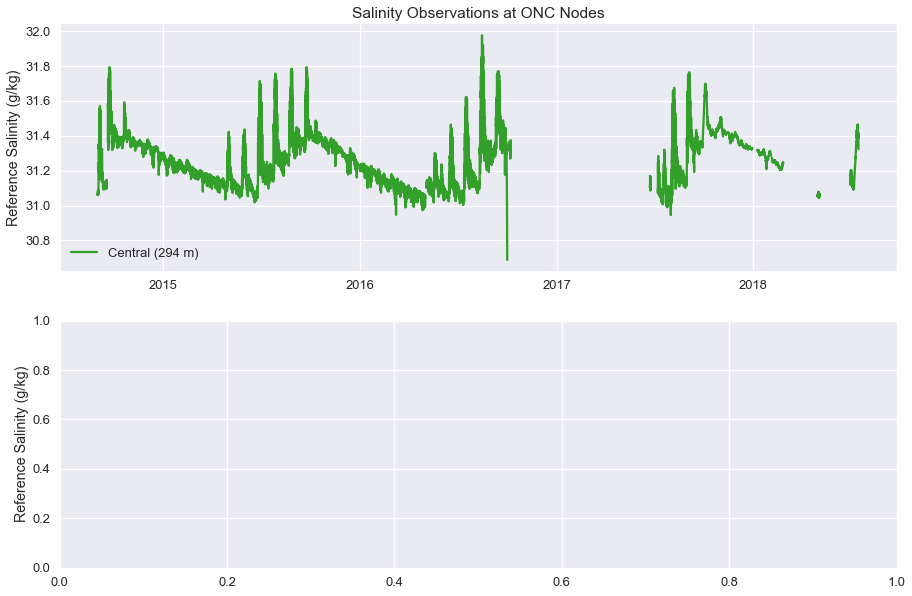

In [4]:
sns.set(color_codes=True)
sns.set_context("talk")
sns.set_palette(sns.color_palette("Paired"))
myp = sns.color_palette()
fig, axs = plt.subplots(2, 1, figsize=(15, 10)) 
#ddl_sal_obs_hourly.plot(ax=axs[1], label='DDL (107 m)', color=myp[2]) 
#bbl_sal_obs_hourly.plot(ax=axs[1], label='BBL (143 m)', color=myp[3]) 
#east_sal_obs_hourly.plot(ax=axs[0], label='East (164 m)', color=myp[2])  
sal_obs_hourly.plot(ax=axs[0], label='Central (294 m)', color=myp[3]) 
for ax in [axs[0], axs[1]]:
    ax.set_ylabel('Reference Salinity (g/kg)')
    ax.legend(loc='lower left')
axs[0].set_title('Salinity Observations at ONC Nodes')


In [5]:
netcdf_file = nc.Dataset('/results/SalishSea/hindcast/13nov14/SalishSea_1h_20141113_20141113_grid_T.nc')
ncunits = netcdf_file.variables['time_counter'].units
nncunits = 'seconds since 1970-01-01 00:00:00'
print(netcdf_file.variables['time_counter'][0], nncunits)
N34_units = "seconds since 2014-09-10 00:00:00"

3624827400.0 seconds since 1970-01-01 00:00:00


# Get Model Results

In [6]:
placename = ''
use_title = 'Salinity at VENUS Central'


(3, 744)
[datetime.datetime(2014, 10, 1, 0, 30)
 datetime.datetime(2014, 10, 1, 1, 30)
 datetime.datetime(2014, 10, 1, 2, 30) ...,
 datetime.datetime(2017, 8, 31, 21, 30)
 datetime.datetime(2017, 8, 31, 22, 30)
 datetime.datetime(2017, 8, 31, 23, 30)]


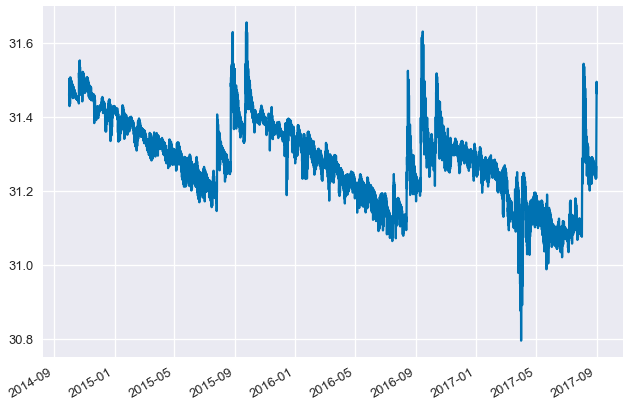

In [9]:
timeseries = 'NowcastGreen1702'
tail = '.npy'
model_results = np.load(timeseries + placename + 'oct14' + tail)
print (model_results.shape)
for smonth in ['nov14', 'dec14', 'jan15', 'feb15', 'mar15', 
               'apr15', 'may15', 'jun15', 'jul15', 'aug15', 'sep15', 
               'oct15', 'nov15', 'dec15', 'jan16', 'feb16', 'mar16', 'apr16', 'may16', 
               'jun16', 'jul16', 'aug16', 'sep16', 'oct16', 'nov16',
               'dec16', 'jan17', 'feb17', 'mar17', 'apr17', 'may17', 
               'jun17', 'jul17', 'aug17']:
    model_results = np.append(model_results, np.load(timeseries + placename + smonth + tail), axis=1)

jp = nc.num2date(model_results[0], ncunits)
print(jp)
sal_model = pd.Series(model_results[1], index=jp)
sal_model.plot()

In [127]:
timeseries = 'Nowcast-3.4'
tail = '.npy'
N34_model_results = np.load(timeseries +placename+ 'oct14' + tail)
for smonth in ['nov14', 'dec14', 'jan15', 'feb15', 'mar15', 
               'apr15', 'may15', 'jun15', 'jul15', 'aug15', 'sep15', 
               'oct15', 'nov15', 'dec15', 'jan16', 'feb16', 'mar16', 
               'apr16', 'may16', 'jun16', 'jul16', 'aug16', 'sep16', 'oct16']:
    N34_model_results = np.append(N34_model_results, np.load(timeseries +placename+ smonth + tail), axis=1)

jp34 = nc.num2date(N34_model_results[0], N34_units)
N34_sal_model = pd.Series(N34_model_results[1], index=jp34)

In [128]:
timeseries = 'NowcastBlue1610'
tail = '.npy'
NB16_model_results = np.load(timeseries +placename+ 'oct16' + tail)
for smonth in ['nov16',
               'dec16', 'jan17', 'feb17', 'mar17', 'apr17', 'may17', 
               'jun17', 'jul17', 'aug17']:
    NB16_model_results = np.append(NB16_model_results, np.load(timeseries +placename+ smonth + tail), axis=1)

jpB16 = nc.num2date(NB16_model_results[0], ncunits)
NB16_sal_model = pd.Series(NB16_model_results[1], index=jpB16)

In [129]:
timeseries = 'NowcastGreen1610'
tail = '.npy'
NG16_model_results = np.load(timeseries +placename+ 'dec15' + tail)
for smonth in ['jan16','feb16', 'mar16', 'apr16', 'may16', 
               'jun16', 'jul16', 'aug16', 'sep16', 'oct16', 'nov16',
               'dec16', 'jan17', 'feb17', 'mar17', 'apr17', 'may17', 
               'jun17', 'jul17', 'aug17']:
    NG16_model_results = np.append(NG16_model_results, np.load(timeseries +placename+ smonth + tail), axis=1)

jpG16 = nc.num2date(NG16_model_results[0], ncunits)
NG16_sal_model = pd.Series(NG16_model_results[1], index=jpG16)

In [24]:
timeseries = 'Hindcast201806'
tail = '.npy'
H18_model_results = np.load(timeseries +placename+ 'nov14' + tail)
for smonth in ['dec14', 'jan15','feb15', 'mar15', 'apr15', 'may15', 
               'jun15', 'jul15', 'aug15', 'sep15', 'oct15', 'nov15',
               'dec15', 'jan16',
#              'feb17', 'mar17', 'apr17', 'may17', 
#               'jun17', 'jul17', 'aug17'
              ]:
    H18_model_results = np.append(H18_model_results, np.load(timeseries +placename+ smonth + tail), axis=1)

jpH18 = nc.num2date(H18_model_results[0], ncunits)
H18_sal_model = pd.Series(H18_model_results[1], index=jpH18)
H18_temp_model = pd.Series(H18_model_results[2], index=jpH18)

# Do Comparison Plot

Text(0.5,1,'Salinity at VENUS Central')

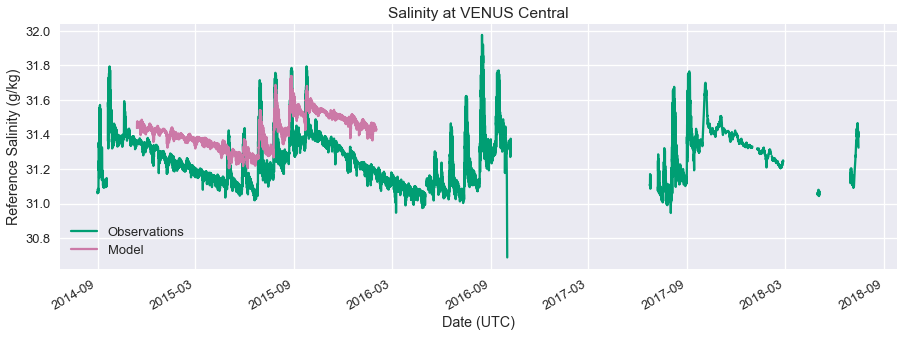

In [36]:
sns.set_palette(sns.color_palette("colorblind"))
myp = sns.color_palette()
#sns.palplot(myp)
fig, ax = plt.subplots(1, 1, figsize=(15,5))
#N34_sal_model.plot(ax=ax, label='Model 3.4')  
#NG16_sal_model.plot(ax=ax, label='Model 201602G', color=myp[4])
#NB16_sal_model.plot(ax=ax, label='Model 201602B', color=myp[5])

H18_sal_model.plot(ax=ax, label='', color='white')
sal_obs_hourly.plot(ax=ax, label='Observations', color=myp[1])
#sal_model.plot(ax=ax, label='v201702', color=myp[2])
H18_sal_model.plot(ax=ax, label='Model', color=myp[3])


#ax.plot(model_results[0], model_results[1])
ax.legend(loc='lower left', ncol=1)
ax.set_ylabel('Reference Salinity (g/kg)')
ax.set_xlabel('Date (UTC)')
ax.set_title(use_title)

(8, 12)

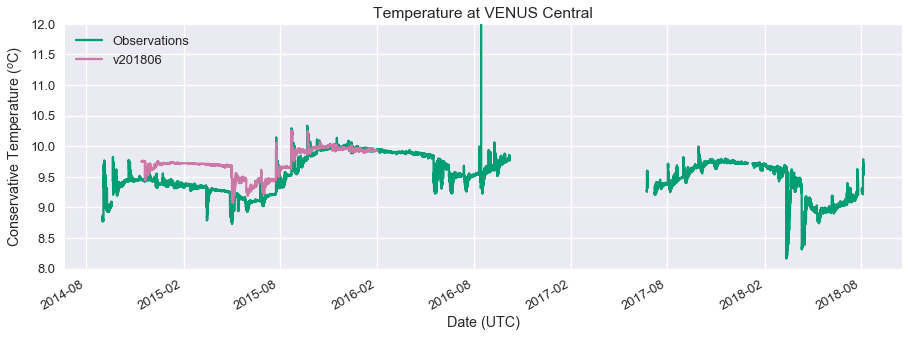

In [34]:
sns.set_palette(sns.color_palette("colorblind"))
myp = sns.color_palette()
#sns.palplot(myp)
fig, ax = plt.subplots(1, 1, figsize=(15,5))
#N34_sal_model.plot(ax=ax, label='Model 3.4')  
#NG16_sal_model.plot(ax=ax, label='Model 201602G', color=myp[4])
#NB16_sal_model.plot(ax=ax, label='Model 201602B', color=myp[5])

H18_temp_model.plot(ax=ax, label='', color='white')
temp_obs_hourly.plot(ax=ax, label='Observations', color=myp[1])
#sal_model.plot(ax=ax, label='v201702', color=myp[2])
H18_temp_model.plot(ax=ax, label='v201806', color=myp[3])


#ax.plot(model_results[0], model_results[1])
ax.legend(loc='upper left', ncol=1)
ax.set_ylabel('Conservative Temperature ($^o$C)')
ax.set_xlabel('Date (UTC)')
ax.set_title("Temperature at VENUS Central")
ax.set_ylim((8,12))

In [35]:
secondsConversion = 2208988800